**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/creditcard.csv')

**Performing EDA (Exploratory Data Analysis) on our DATA:**

In [3]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
credit_card_data.shape

(7973, 31)

In [5]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7973 non-null   int64  
 1   V1      7973 non-null   float64
 2   V2      7973 non-null   float64
 3   V3      7973 non-null   float64
 4   V4      7973 non-null   float64
 5   V5      7973 non-null   float64
 6   V6      7973 non-null   float64
 7   V7      7973 non-null   float64
 8   V8      7973 non-null   float64
 9   V9      7973 non-null   float64
 10  V10     7973 non-null   float64
 11  V11     7973 non-null   float64
 12  V12     7973 non-null   float64
 13  V13     7973 non-null   float64
 14  V14     7973 non-null   float64
 15  V15     7972 non-null   float64
 16  V16     7972 non-null   float64
 17  V17     7972 non-null   float64
 18  V18     7972 non-null   float64
 19  V19     7972 non-null   float64
 20  V20     7972 non-null   float64
 21  V21     7972 non-null   float64
 22  

In [6]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [7]:
# removing missing values
credit_card_data=credit_card_data.dropna()

In [8]:
#verifying again missing values
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [9]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

,count
Class,
0.0,7947
1.0,25


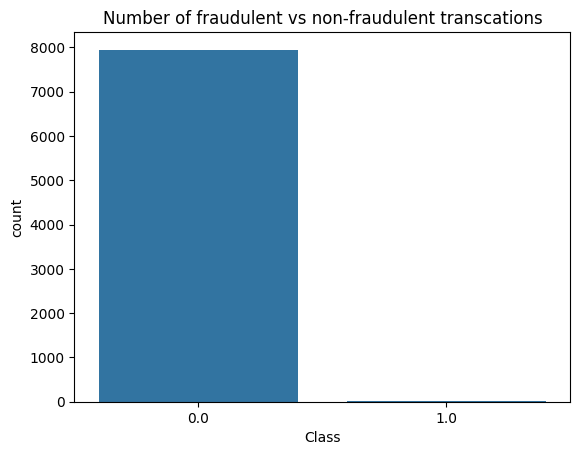

In [10]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=credit_card_data)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

**This Dataset is highly unblanced**


0 --> Normal Transaction

1 --> fraudulent transaction


In [11]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [12]:
print(legit.shape)
print(fraud.shape)

(7947, 31)
(25, 31)


/tmp/ipython-input-13-1620284639.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(fraud['Time'],label='fraudulent',hist=False)
/tmp/ipython-input-13-1620284639.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(legit['Time'],label='non fraudulent',hist=False)


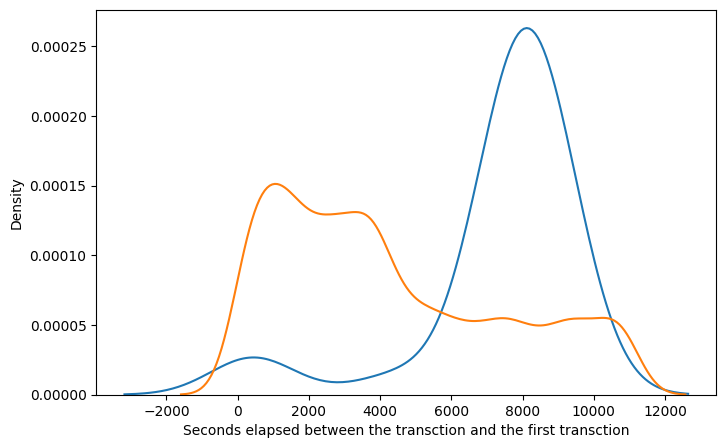

In [13]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(legit['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()


Analysis

We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time.



/tmp/ipython-input-14-1183572376.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(fraud['Amount'],label='fraudulent',hist=False)
/tmp/ipython-input-14-1183572376.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(legit['Amount'],label='non fraudulent',hist=False)


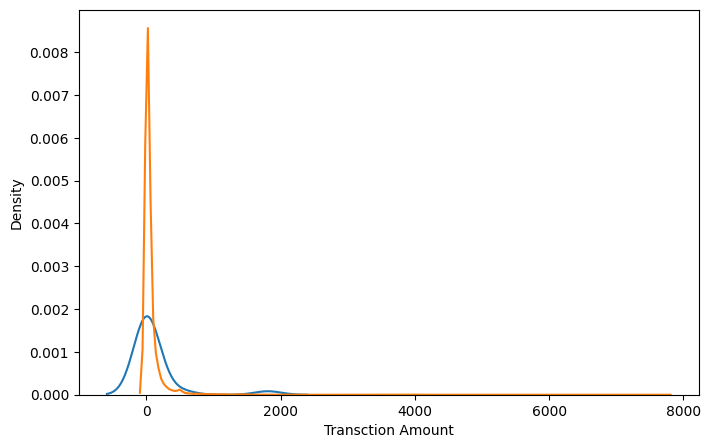

In [14]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(legit['Amount'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()


Analysis

We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.


In [15]:
# statistical measures of the data
legit.Amount.describe()

,Amount
count,7947.000000
mean,65.284891
std,194.126547
min,0.000000
25%,4.795000
50%,15.950000
75%,54.990000
max,7712.430000


In [16]:
# statistical measures of the data
fraud.Amount.describe()

,Amount
count,25.000000
mean,106.308400
std,372.676883
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1809.680000




Under-Sampling (to tackle imbalanced data_set)

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492


In [17]:
legit_sample = legit.sample(n=492)

In [18]:
#concatenating both data sets
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [19]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5791,6210,-3.242214,0.242916,2.740196,-0.348763,1.944548,2.186593,2.499907,-2.636714,4.866316,...,-0.566019,1.442404,-0.212869,-0.970742,-0.459460,-0.882117,-4.255358,-1.931920,47.57,0.0
5918,6518,-1.507481,0.246393,2.531043,-2.567173,-0.725088,-1.010804,-0.001468,-0.181384,3.362300,...,-0.026613,0.563221,-0.239996,0.342839,0.433181,-0.070320,-0.016632,-0.020591,14.00,0.0
4745,4187,-1.305164,2.100494,1.103515,2.979714,-0.032294,-0.208137,0.893183,-0.071352,-0.657333,...,-0.047113,-0.006735,-0.180194,0.368067,0.427937,0.274911,-0.551512,-0.047545,67.46,0.0
4317,3759,1.210985,-0.589407,0.474093,-0.875727,-0.027225,1.548038,-1.105398,0.505876,0.287589,...,-0.101344,-0.051886,0.227129,-1.431203,-0.099226,-0.387257,0.049879,-0.013105,5.00,0.0
7743,10784,-9.791064,8.261750,-2.524941,-0.896418,-2.430637,4.530167,-8.784593,-22.159063,3.130838,...,22.588989,-8.527145,3.642683,-0.534120,0.489866,0.228191,1.152759,0.156205,10.76,0.0


In [20]:
new_dataset['Class'].value_counts()

,count
Class,
0.0,492
1.0,25


In [21]:
#spilliting data into features and target
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [22]:
print(X)

       Time        V1        V2        V3        V4        V5        V6  \
5791   6210 -3.242214  0.242916  2.740196 -0.348763  1.944548  2.186593   
5918   6518 -1.507481  0.246393  2.531043 -2.567173 -0.725088 -1.010804   
4745   4187 -1.305164  2.100494  1.103515  2.979714 -0.032294 -0.208137   
4317   3759  1.210985 -0.589407  0.474093 -0.875727 -0.027225  1.548038   
7743  10784 -9.791064  8.261750 -2.524941 -0.896418 -2.430637  4.530167   
...     ...       ...       ...       ...       ...       ...       ...   
6870   8757 -1.863756  3.442644 -4.468260  2.805336 -2.118412 -2.332285   
6882   8808 -4.617217  1.695694 -3.114372  4.328199 -1.873257 -0.989908   
6899   8878 -2.661802  5.856393 -7.653616  6.379742 -0.060712 -3.131550   
6903   8886 -2.535852  5.793644 -7.618463  6.395830 -0.065210 -3.136372   
6971   9064 -3.499108  0.258555 -4.489558  4.853894 -6.974522  3.628382   

            V7         V8        V9  ...       V20        V21       V22  \
5791  2.499907  -2.63671

In [23]:
print(Y)

5791    0.0
5918    0.0
4745    0.0
4317    0.0
7743    0.0
       ... 
6870    1.0
6882    1.0
6899    1.0
6903    1.0
6971    1.0
Name: Class, Length: 517, dtype: float64


Split the data into Training data & Testing Data

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [25]:
print(X.shape, x_train.shape, x_test.shape)

(517, 30) (413, 30) (104, 30)


Model Training

In [26]:
model = LogisticRegression()

In [27]:
# training the Logistic Regression Model with Training Data
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()



Model Evaluation

Accuracy Score


In [28]:
# accuracy on training data
x_train_pred = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_pred, y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [29]:
# accuracy on test data
x_test_pred = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_pred,y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9903846153846154


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [31]:
model_2 = RandomForestClassifier()
model_2.fit(x_train,y_train)

RandomForestClassifier()

In [32]:
x_test_pred_2=model_2.predict(x_test)
test_data_accuracy_2 = accuracy_score(x_test_pred_2,y_test)
print('Accuracy score on Test Data : ', test_data_accuracy_2)

Accuracy score on Test Data :  0.9903846153846154


In [33]:
model_3=SVC(kernel='linear')
model_3.fit(x_train,y_train)

SVC(kernel='linear')

In [34]:
x_test_pred_3=model_3.predict(x_test)
test_data_accuracy_3 = accuracy_score(x_test_pred_3,y_test)
print('Accuracy score on Test Data : ', test_data_accuracy_3)

Accuracy score on Test Data :  0.9807692307692307


In [35]:
Accuracy=[test_data_accuracy,test_data_accuracy_2,test_data_accuracy_3]
Models=['Logistic_regression','Random_Forest','SVM']

In [36]:
print(Accuracy)

[0.9903846153846154, 0.9903846153846154, 0.9807692307692307]


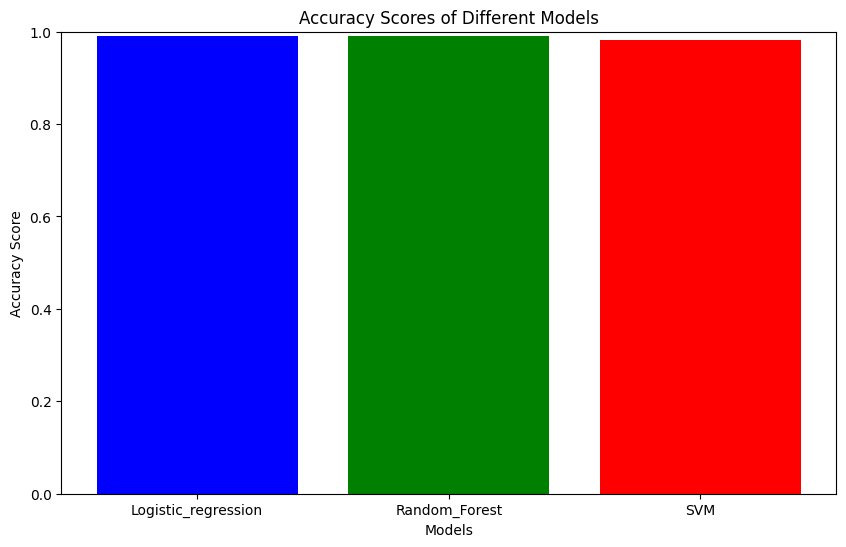

In [37]:
plt.figure(figsize=(10, 6))
plt.bar( Models,Accuracy, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Models')
plt.ylim(0, 1)
plt.show()